# Exploration of Zipfness in Modern Tokenizers
Members: Jack Hanke, Daniel Plotkin, Nicole Birova

In [21]:
# get RoBERTa, GPT-4 tokenizers
from transformers import RobertaTokenizer, AutoTokenizer
import tiktoken

class RoBERTa_Tokenizer:
    def __init__(self):
        self.name = 'RoBERTa Tokenizer'
        self.tokenizer = RobertaTokenizer.from_pretrained("FacebookAI/roberta-base")
    def tokenize(self, text_str: str):
        return self.tokenizer(text_str)['input_ids']
        return self.tokenizer.encode(text_str[:512])
        return self.tokenizer.encode(text_str)
    def detokenize(self, tokens: list[int]):
        return self.tokenizer.decode(tokens)

class GPT4_Tokenizer:
    def __init__(self):
        self.name = 'GPT 4 Tokenizer'
        self.tokenizer = tiktoken.encoding_for_model("gpt-4o")
    def tokenize(self, text_str: str):
        return self.tokenizer.encode(text_str, disallowed_special=())
    def detokenize(self, tokens: list[int]):
        return self.tokenizer.decode(tokens)

roberta_tokenizer = RoBERTa_Tokenizer()
gpt_tokenizer = GPT4_Tokenizer()

text_str = "Hello world"
assert roberta_tokenizer.detokenize(roberta_tokenizer.tokenize(text_str=text_str))
assert gpt_tokenizer.detokenize(gpt_tokenizer.tokenize(text_str=text_str))


In [15]:
# 
def increment_dict(dictionary: dict, key: str):
    try:
        dictionary[key] += 1
    except KeyError:
        dictionary[key] = 1

# 
def sort_dictionary(dictionary: dict):
    return {k: v for k, v in sorted(dictionary.items(), key=lambda item: item[1], reverse=True)}

# 
# increment frequency for a given item (sentence) and a given tokenizer
def increment_frequency(dictionary:dict, item: str, tokenizer):
    # if no tokenizer, increment word freq
    if tokenizer is None:
        for count, word in enumerate(item.split()):
            increment_dict(dictionary=dictionary, key=word)
        return count+1
    
    # increment token freq
    tokens = tokenizer.tokenize(item)
    for count, token in enumerate(tokens):
        increment_dict(dictionary=dictionary, key=token)
    return count+1

# 
def normalize_dictionary(dictionary: dict, denominator: int):
    return_dictionary = {}
    for key, value in dictionary.items():
        return_dictionary[key] = value/denominator
    
    return return_dictionary


In [ ]:
# get bookscorpus from: "https://storage.googleapis.com/huggingface-nlp/datasets/bookcorpus/bookcorpus.tar.bz2"
from tqdm import tqdm

# experiment filenames
def experiment(filenames: list[str]):
    word_freq_dict, gpt_token_freq_dict, roberta_token_freq_dict = {}, {}, {}
    word_count, gpt_token_count, roberta_token_count = 0, 0, 0

    for filename in filenames:
        with open(filename, 'r') as f:
            prog_bar = tqdm(f.readlines())
            for line in prog_bar:
                item = str(line)
                word_count += increment_frequency(dictionary=word_freq_dict, item=item, tokenizer=None)
                gpt_token_count += increment_frequency(dictionary=gpt_token_freq_dict, item=item, tokenizer=gpt_tokenizer)
                roberta_token_count += increment_frequency(dictionary=roberta_token_freq_dict, item=item, tokenizer=roberta_tokenizer)

    # 
    sorted_word_freq_dict = sort_dictionary(dictionary=word_freq_dict)
    word_frequencies = normalize_dictionary(dictionary=sorted_word_freq_dict, denominator=word_count)

    sorted_gpt_token_freq_dict = sort_dictionary(dictionary=gpt_token_freq_dict)
    gpt_token_frequencies = normalize_dictionary(dictionary=sorted_gpt_token_freq_dict, denominator=gpt_token_count)

    sorted_roberta_token_freq_dict = sort_dictionary(dictionary=roberta_token_freq_dict)
    roberta_token_frequencies = normalize_dictionary(dictionary=sorted_roberta_token_freq_dict, denominator=roberta_token_count)

    return word_frequencies, gpt_token_frequencies, roberta_token_frequencies


100%|██████████| 34004228/34004228 [38:09<00:00, 14855.38it/s]


In [ ]:
# bookscorpus experiment
# NOTE these are over 2GB each
filenames = [f'data/books_large_p1.txt', f'data/books_large_p2.txt']

bookscorpus_word_frequencies, bookscorpus_gpt_token_frequencies, bookscorpus_roberta_token_frequencies = experiment(filenames=filenames)

In [ ]:
from datasets import load_dataset, Dataset

def get_minipile():
    ds = load_dataset("JeanKaddour/minipile")
    ds.save_to_disk('data/minipile')

README.md:   0%|          | 0.00/3.25k [00:00<?, ?B/s]

(…)-00000-of-00012-6fbcb5acda05b3c0.parquet:   0%|          | 0.00/258M [00:00<?, ?B/s]

(…)-00001-of-00012-2bb9d088068a84c9.parquet:   0%|          | 0.00/262M [00:00<?, ?B/s]

(…)-00002-of-00012-efb6c8de04272068.parquet:   0%|          | 0.00/259M [00:00<?, ?B/s]

(…)-00003-of-00012-47006e5a888a9324.parquet:   0%|          | 0.00/275M [00:00<?, ?B/s]

(…)-00004-of-00012-a6a94a0207e8e96c.parquet:   0%|          | 0.00/260M [00:00<?, ?B/s]

(…)-00005-of-00012-d255c96cd87a0aa7.parquet:   0%|          | 0.00/263M [00:00<?, ?B/s]

(…)-00006-of-00012-89040916c30140e6.parquet:   0%|          | 0.00/259M [00:00<?, ?B/s]

(…)-00007-of-00012-239b43e016d4ac92.parquet:   0%|          | 0.00/256M [00:00<?, ?B/s]

(…)-00008-of-00012-3273ba93936ad8ef.parquet:   0%|          | 0.00/260M [00:00<?, ?B/s]

(…)-00009-of-00012-0b640f47936d940a.parquet:   0%|          | 0.00/264M [00:00<?, ?B/s]

(…)-00010-of-00012-d266658ccbfa0537.parquet:   0%|          | 0.00/270M [00:00<?, ?B/s]

(…)-00011-of-00012-aec474909333c631.parquet:   0%|          | 0.00/258M [00:00<?, ?B/s]

(…)-00000-of-00001-a2192e61a091cecb.parquet:   0%|          | 0.00/1.52M [00:00<?, ?B/s]

(…)-00000-of-00001-010a6231c4b54d31.parquet:   0%|          | 0.00/31.5M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1000000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/500 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [ ]:
ds = load_dataset('data/minipile')

Saving the dataset (0/12 shards):   0%|          | 0/1000000 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/500 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/10000 [00:00<?, ? examples/s]

In [25]:
from tqdm import tqdm

# experiment filenames
def minipile_experiment(ds: Dataset):
    word_freq_dict, gpt_token_freq_dict, roberta_token_freq_dict = {}, {}, {}
    word_count, gpt_token_count, roberta_token_count = 0, 0, 0

    prog_bar = tqdm(ds['train'])
    for line in prog_bar:
        item = str(line['text'])
        word_count += increment_frequency(dictionary=word_freq_dict, item=item, tokenizer=None)
        gpt_token_count += increment_frequency(dictionary=gpt_token_freq_dict, item=item, tokenizer=gpt_tokenizer)
        roberta_token_count += increment_frequency(dictionary=roberta_token_freq_dict, item=item, tokenizer=roberta_tokenizer)

    # 
    sorted_word_freq_dict = sort_dictionary(dictionary=word_freq_dict)
    word_frequencies = normalize_dictionary(dictionary=sorted_word_freq_dict, denominator=word_count)

    sorted_gpt_token_freq_dict = sort_dictionary(dictionary=gpt_token_freq_dict)
    gpt_token_frequencies = normalize_dictionary(dictionary=sorted_gpt_token_freq_dict, denominator=gpt_token_count)

    sorted_roberta_token_freq_dict = sort_dictionary(dictionary=roberta_token_freq_dict)
    roberta_token_frequencies = normalize_dictionary(dictionary=sorted_roberta_token_freq_dict, denominator=roberta_token_count)

    return word_frequencies, gpt_token_frequencies, roberta_token_frequencies

minipile_word_frequencies, minipile_gpt_token_frequencies, minipile_roberta_token_frequencies = minipile_experiment(ds = ds)

100%|██████████| 1000000/1000000 [1:25:11<00:00, 195.63it/s]


In [26]:
# save distributions
import pickle

# dataset = 'bookscorpus'
dataset = 'minipile'
with open(f'{dataset}_words.pickle', 'wb') as f:
    pickle.dump(minipile_word_frequencies, f) 
with open(f'{dataset}_gpt4.pickle', 'wb') as f:
    pickle.dump(minipile_gpt_token_frequencies, f) 
with open(f'{dataset}_roberta.pickle', 'wb') as f:
    pickle.dump(minipile_roberta_token_frequencies, f) 

In [ ]:
# load distributions
import pickle

# dataset = 'bookscorpus'
dataset = 'minipile'
with open(f'{dataset}_words.pickle', 'rb') as f:
    word_frequencies = pickle.load(f) 
with open(f'{dataset}_gpt4.pickle', 'rb') as f:
    gpt_token_frequencies = pickle.load(f) 
with open(f'{dataset}_roberta.pickle', 'rb') as f:
    roberta_token_frequencies = pickle.load(f) 

/home/jack/vault/gradschool/dlvenv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


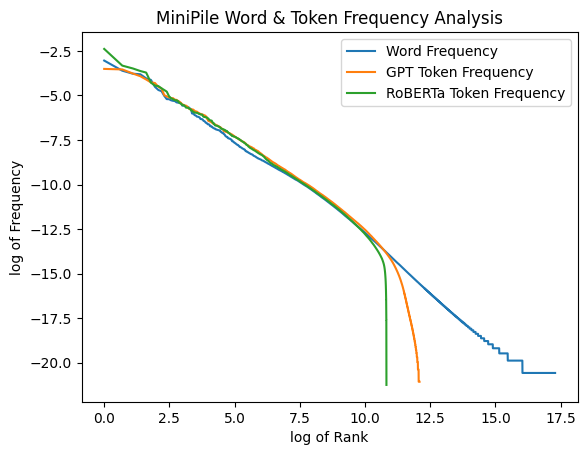

In [27]:
# 
import matplotlib.pyplot as plt
from math import log

plt.plot([log(key_num+1) for key_num, key in enumerate(minipile_word_frequencies)], [log(float(value)) for key, value in minipile_word_frequencies.items()], label='Word Frequency')
plt.plot([log(key_num+1) for key_num, key in enumerate(minipile_gpt_token_frequencies)], [log(float(value)) for key, value in minipile_gpt_token_frequencies.items()], label='GPT Token Frequency')
plt.plot([log(key_num+1) for key_num, key in enumerate(minipile_roberta_token_frequencies)], [log(float(value)) for key, value in minipile_roberta_token_frequencies.items()], label='RoBERTa Token Frequency')
plt.title(f'MiniPile Word & Token Frequency Analysis')
plt.xlabel(f'log of Rank')
plt.ylabel(f'log of Frequency')
plt.legend()
plt.show()

In [ ]:
import scipy.stats as stats

# test the zipfness of a corpus, tokenizer pair
def test_zipfness(freq_dict: dict):
    # TODO fit distribution

    # TODO kolmogorov-smirnov test each distribution
    distributions = [

    ]

    result = stats.ktest()

    return result


In [ ]:
# TODO results on cleaned C4